# Lucrarea de laborator nr. 1

&copy; Cristian Cemîrtan, 2024

## Colectarea datelor

1. Accesăm http://sistemulenergetic.ro
2. Setăm câmpurile de intrare ca:
   - Start: `2022`, `October`, `1`, `00`, `00`;
   - End: `2024`, `September`, `30`, `23`, `59`.
3. Descărcăm setul de date prin apăsarea butonului `Exportă`;
4. Setul de date va fi salvat cu denumirea fișierului `data.csv`.

## Încărcarea datelor

Datele vor încărcate din fișierul `data.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

df = pd.read_csv('data.csv')
df.head()

,date,carbune,consum,hidro,hidrocarburi,nuclear,eolian,productie,fotovolt,biomasa,sold
0,2024-09-30 16:29:14,831,6306,1563,863,1308,2588,7474,261,57,-1168
1,2024-09-30 04:48:21,802,4554,876,889,1368,2466,6449,-4,49,-1894
2,2024-09-29 15:56:21,764,5503,1062,847,1373,873,5044,57,50,458
3,2024-09-29 03:55:29,754,4715,1255,890,1366,359,4673,-3,51,42
4,2024-09-28 14:47:25,724,4847,926,774,1374,418,5226,955,51,-379


## Prelucrarea datelor

Vom împărți atributul `date` în mai multe atribute:
- `year` - anul;
- `month` - luna;
- `day` - ziua;
- `week` - săpămâna;
- `hour` - ora;
- `day_of_week` - ziua săptămânii.

In [2]:
date = pd.to_datetime(df['date']).dt
df = df.drop('date', axis=1)

df['year'] = date.year
df['month'] = date.month
df['day'] = date.day
df['week'] = df['day'].map(lambda x: (x - 1) // 7 + 1)
df['hour'] = date.hour
df['day_of_week'] = date.dayofweek
df.head()

,carbune,consum,hidro,hidrocarburi,nuclear,eolian,productie,fotovolt,biomasa,sold,year,month,day,week,hour,day_of_week
0,831,6306,1563,863,1308,2588,7474,261,57,-1168,2024,9,30,5,16,0
1,802,4554,876,889,1368,2466,6449,-4,49,-1894,2024,9,30,5,4,0
2,764,5503,1062,847,1373,873,5044,57,50,458,2024,9,29,5,15,6
3,754,4715,1255,890,1366,359,4673,-3,51,42,2024,9,29,5,3,6
4,724,4847,926,774,1374,418,5226,955,51,-379,2024,9,28,4,14,5


Se necesită de inversat ordinea rândurilor, astfel încât să fie crescătoare cronologic.

In [3]:
df = df[::-1].reset_index(drop=True)
df.head()

,carbune,consum,hidro,hidrocarburi,nuclear,eolian,productie,fotovolt,biomasa,sold,year,month,day,week,hour,day_of_week
0,868,5552,1140,949,1383,99,4982,487,56,570,2022,10,1,1,11,5
1,896,5153,1155,1162,1380,591,5240,0,56,-87,2022,10,1,1,23,5
2,844,4842,777,427,1381,1442,5415,490,54,-573,2022,10,2,1,10,6
3,842,5100,1022,481,1380,1202,4989,0,62,111,2022,10,2,1,22,6
4,1002,6676,1636,1257,1336,145,5694,253,64,982,2022,10,3,1,10,0


## Diagrame

### Crearea diagramei de distribuție pe tipuri de energie

Observăm că `hidro` este cel mai distribuit tip de energie, iar `biomasa` este cel mai puțin distribuit.

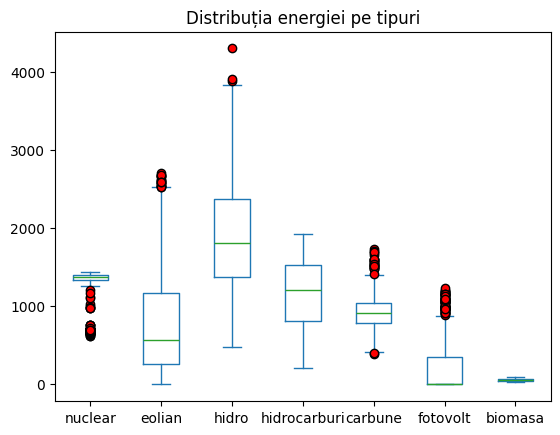

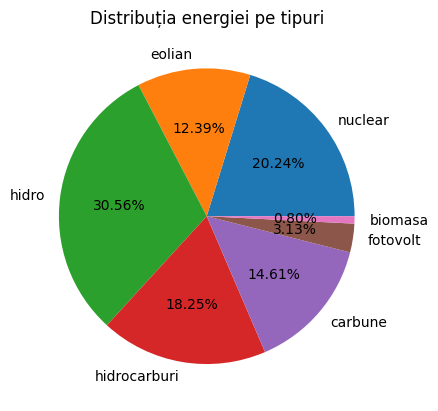

In [4]:
energy_types = ['nuclear', 'eolian', 'hidro', 'hidrocarburi', 'carbune', 'fotovolt', 'biomasa']
df_energy_distribution = df[energy_types]

df_energy_distribution.plot(kind='box', flierprops={'markerfacecolor': 'red'})
plt.title('Distribuția energiei pe tipuri')
plt.show()

df_energy_distribution.sum().plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribuția energiei pe tipuri')
plt.show()

### Crearea diagramei comparative pe luni pentru export/producție de energie

Conform site-ului http://sistemulenergetic.ro, valorile negative pentru atributul `sold` înseamnă export.

Pentru a realiza această diagramă:
  - Au fost extrase valorile negative din coloana `sold`;
  - Au fost calculate opusurile lor (înmulțirea cu `-1`);
  - Valorile lor, inclusiv cele din coloana `productie`, au fost agregate prin sumă, fiind grupate pe lună.

In [5]:
years = df['year'].drop_duplicates()

@ipywidgets.interact(year=years)
def task_1(year):
    df_year = df[df['year'] == year].copy()
    df_year['export'] = -df_year.loc[df_year['sold'] < 0, 'sold']

    df_year = df_year.groupby('month')[['productie', 'export']].sum()
    
    df_year.plot(kind='bar')
    plt.title('Diagrama comparativă pe luni pentru export/producție de energie')
    plt.xlabel('Luna')
    plt.ylabel('Energie [MW]')
    plt.show()

interactive(children=(Dropdown(description='year', options=(2022, 2023, 2024), value=2022), Output()), _dom_cl…

## Crearea diagramelor ce reflectă valorile de vârf

Observăm că:
  - `Consumul` depășește `producție`:
    - În lunile aprilie - august (5 luni), 2024;
    - În lunile august, octombrie și noiembrie. 2023.

In [6]:
months = df['month'].drop_duplicates().sort_values()
weeks = df['week'].drop_duplicates().sort_values()
days_of_week = df['day_of_week'].drop_duplicates().sort_values()

@ipywidgets.interact(year=[None, *years], month=[None, *months], week=[None, *weeks], day_of_week=[None, *days_of_week])
def task_2(year, month, week, day_of_week):
    if day_of_week is not None:
        grouping_col = 'hour'
        x_label = 'Ora'
        title = 'Valorile de vârf pe ore'
    elif week is not None:
        grouping_col = 'day_of_week'
        x_label = 'Ziua săptămânii'
        title = 'Valorile de vârf pe zilele săptămânii'
    elif month is not None:
        grouping_col = 'week'
        x_label = 'Săptămâna'
        title = 'Valorile de vârf pe săptămâni'
    elif year is not None:
        grouping_col = 'month'
        x_label = 'Luna'
        title = 'Valorile de vârf pe luni'
    else:
        grouping_col = 'year'
        x_label = 'Anul'
        title = 'Valorile de vârf pe ani'
    
    mask = np.repeat(True, df.shape[0])
    
    if day_of_week is not None:
        mask = mask & (df['day_of_week'] == day_of_week)
        
    if week is not None:
        mask = mask & (df['week'] == week)
        
    if month is not None:
        mask = mask & (df['month'] == month)
        
    if year is not None:
        mask = mask & (df['year'] == year)

    peak = df[mask].groupby(grouping_col).max()

    peak.plot(y=['productie', 'consum'], kind='bar')
    plt.title(title)
    plt.xlabel(x_label)
    plt.show()

interactive(children=(Dropdown(description='year', options=(None, 2022, 2023, 2024), value=None), Dropdown(des…

### Crearea diagramei comparative de serii temporale pe fiecare tip de energie

Observăm că pentru unele tipuri de energie:
  - La `nuclear`:
    - În anumite intervale de timp se produce circa 50% de energie decât ca de obicei.
  - La `hidrocarburi`:
    - În 2023, producerea energiei a intrat în declin în luna martie, apoi a început să crească în luna iulie;
    - În 2024, declinul a avut loc aproape de luna aprilie, a crescut în luna iunie.
  - La `fotovolt`:
    - Are loc deseori „spinuri ascuțite” în producerea energiei - crește și coboară la zero în continuu:
      - Evident că, nu se produce energie pe timp de noapte (nu este soare).
    - Se întâmplă rar că produce foarte puțin sau deloc energie.
  - La `eolian`:
    - Aceeași soartă ca la `fotovolt`, dar produce mai multă energie pe parcurs;
    - Sunt mai puține „spinuri ascuțite”.

In [7]:
days = df['day'].drop_duplicates().sort_values()

@ipywidgets.interact(energy_types=ipywidgets.SelectMultiple(options=energy_types), year=[None, *years], month=[None, *months], day=[None, *days])
def task_3(energy_types, year, month, day):
    if not energy_types:
        return

    mask = np.repeat(True, df.shape[0])

    if year is not None:
        mask = mask & (df['year'] == year)
        
        if month is not None:
            mask = mask & (df['month'] == month)
            
            if day is not None:
                mask = mask & (df['day'] == day)
                
                grouping_col = 'hour'
                x_label = 'Ora'
                title = 'Serie temporală orară'
            else:
                grouping_col = 'day'
                x_label = 'Ziua'
                title = 'Serie temporală zilnică'
        else:
            grouping_col = 'month'
            x_label = 'Luna'
            title = 'Serie temporală lunara'
    else:
        grouping_col = 'year'
        x_label = 'Anul'
        title = 'Serie temporală anuală' 

    ticks = df[mask][grouping_col].drop_duplicates()

    time_series = df[mask]

    time_series.plot(y=list(energy_types))

    if grouping_col == 'day':
        ticks = ticks[::2]
    
    plt.xticks(ticks.index, ticks)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.show()

interactive(children=(SelectMultiple(description='energy_types', options=('nuclear', 'eolian', 'hidro', 'hidro…